# Climate Anxiety in Youth and Perception of Government
## Question/Hypothesis: 
**Response Variable:** Q1 - I am worried that climate change threatens people and the planet.

**Predictors:** language, country, region, age, sex, Q2-Q8

## Importing Data

In [1]:
# Data Processing
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import export_graphviz
import scipy.stats as stats
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import tensorflow as tf
import graphviz
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from statsmodels.miscmodels.ordinal_model import OrderedModel
from sklearn.metrics import r2_score

In [2]:
df = pd.read_spss('Climate Anxiety-3.SAV')
df.head()

,Respondent_Serial,language,country,D1,D2,D3,Q1,Q2_1,Q2_2,Q2_3,...,regionUS,regionUK,regionIndia,regionNigeria,regionPhilippines,regionFinland,regionPortugal,regionBrazil,regionFrance,weight
0,25.0,French,France,22.0,man,France: South,extremely,yes,yes,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South,0.955127
1,26.0,English,Philippines,25.0,woman,Philippines: Metro Luzon Urban Beltway/ North ...,extremely,yes,yes,yes,...,NaN,NaN,NaN,NaN,Metro Luzon Urban Beltway/ North Luzon Agribus...,NaN,NaN,NaN,NaN,0.649680
2,27.0,English,Philippines,24.0,woman,Philippines: Metro Luzon Urban Beltway/ North ...,extremely,yes,yes,yes,...,NaN,NaN,NaN,NaN,Metro Luzon Urban Beltway/ North Luzon Agribus...,NaN,NaN,NaN,NaN,0.649680
3,28.0,English,Australia,20.0,woman,Australia: South Australia,a little,no,yes,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.915752
4,29.0,English,India,18.0,woman,India: West India,extremely,no,no,no,...,NaN,NaN,West India,NaN,NaN,NaN,NaN,NaN,NaN,1.183360


## Data Exploration

In [3]:
df.columns, len(df.columns)

(Index(['Respondent_Serial', 'language', 'country', 'D1', 'D2', 'D3', 'Q1',
        'Q2_1', 'Q2_2', 'Q2_3', 'Q2_4', 'Q2_5', 'Q2_6', 'Q2_7', 'Q2_8', 'Q2_9',
        'Q2_10', 'Q2_11', 'Q2_12', 'Q2_13', 'Q2_14', 'Q3', 'Q4_1', 'Q4_2',
        'Q4_3', 'Q4_4', 'Q4_5', 'Q4_6', 'Q4_7', 'Q5', 'Q6', 'Q7_1', 'Q7_2',
        'Q7_3', 'Q7_4', 'Q7_5', 'Q7_6', 'Q7_7', 'Q7_8', 'Q7_9', 'Q8_1', 'Q8_2',
        'Q8_3', 'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9', 'yyyymmdd',
        'AgeGender', 'regionAustralia', 'regionUS', 'regionUK', 'regionIndia',
        'regionNigeria', 'regionPhilippines', 'regionFinland', 'regionPortugal',
        'regionBrazil', 'regionFrance', 'weight'],
       dtype='object'),
 62)

In [4]:
df.dtypes

Respondent_Serial     float64
language             category
country              category
D1                    float64
D2                   category
                       ...   
regionFinland        category
regionPortugal       category
regionBrazil         category
regionFrance         category
weight                float64
Length: 62, dtype: object

In [5]:
df['Q1'].value_counts()

Q1
very           3223
extremely      2706
moderately     2428
a little       1022
not worried     473
Name: count, dtype: int64

In [6]:
df['Q1'].value_counts(normalize=True)

Q1
very           0.327142
extremely      0.274665
moderately     0.246447
a little       0.103735
not worried    0.048011
Name: proportion, dtype: float64

In [7]:
# Count nan or 'Prefer not to say' values in the Q1 column
df['Q1'].isna().sum(), df['Q1'].str.contains('Prefer not to say').sum()

(148, 0)

In [8]:
df[df['Q1'].isna()]

,Respondent_Serial,language,country,D1,D2,D3,Q1,Q2_1,Q2_2,Q2_3,...,regionUS,regionUK,regionIndia,regionNigeria,regionPhilippines,regionFinland,regionPortugal,regionBrazil,regionFrance,weight
68,114.0,English,Australia,21.0,woman,Australia: Tasmania,NaN,no,yes,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.739153
162,232.0,English,United Kingdom,21.0,woman,United Kingdom: North,NaN,no,yes,no,...,NaN,North,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.957871
209,290.0,English,Australia,21.0,woman,Australia: New South Wales,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.771648
213,296.0,English,India,23.0,man,India: North India,NaN,no,no,no,...,NaN,NaN,North India,NaN,NaN,NaN,NaN,NaN,NaN,0.814742
230,321.0,English,Australia,21.0,man,Australia: Victoria,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.129098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9807,14903.0,English,Australia,25.0,man,Australia: Western Australia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.145472
9853,15041.0,English,Nigeria,21.0,woman,Nigeria: South West,NaN,no,no,no,...,NaN,NaN,NaN,South West,NaN,NaN,NaN,NaN,NaN,0.433441
9862,15057.0,English,Nigeria,21.0,woman,Nigeria: South West,NaN,no,yes,yes,...,NaN,NaN,NaN,South West,NaN,NaN,NaN,NaN,NaN,0.433441
9867,15067.0,English,Nigeria,23.0,man,Nigeria: South South,NaN,yes,no,yes,...,NaN,NaN,NaN,South South,NaN,NaN,NaN,NaN,NaN,0.348822


In [9]:
df['AgeGender'].unique(), len(df['AgeGender'])

(['Men 21-25', 'Women 21-25', 'Women 16-20', 'Men 16-20']
 Categories (4, object): ['Men 16-20', 'Men 21-25', 'Women 16-20', 'Women 21-25'],
 10000)

In [10]:
# Count the number of men and women in the dataset
df['AgeGender'].value_counts()

AgeGender
Women 21-25    3153
Men 21-25      2900
Men 16-20      1994
Women 16-20    1953
Name: count, dtype: int64

## Data Cleaning

#### Replace columns with more descriptive names
The original convention used to describe the columns is not very descriptive. We will replace the column names with more descriptive names.

The new convention will be the Question number (Q1, Q2, Q3, etc.) followed by a descriptive word from the poll associated with that question/subquestion.

For example, Q2 is "Does climate change make you feel any of the following?" with sad being one of the options, and the responses being yes, no, and prefer not to say. The new column name will be Q2_sad and will contain the values yes, not, or nan.

In [11]:
columns = ['Repondent_Serial', 'language', 'country', 'age', 'sex', 'country:region', 
           'Q1', 
           'Q2_sad', 'Q2_helpless', 'Q2_anxious', 'Q2_afraid', 'Q2_optimistic',
           'Q2_angry', 'Q2_guilty', 'Q2_ashamed', 'Q2_hurt', 'Q2_depressed', 'Q2_despair',
           'Q2_grief', 'Q2_powerless', 'Q2_indifferent', 
           'Q3', 
           'Q4_hesitant', 'Q4_doomed','Q4_frightening', 'Q4_oppotunities', 'Q4_threatened', 'Q4_destroyed', 'Q4_failed',
           'Q5', 
           'Q6', 
           'Q7_concerns', 'Q7_catastrophe', 'Q7_distress', 'Q7_science', 'Q7_generations', 'Q7_trusted', 'Q7_effectiveness', 'Q7_failing', 'Q7_betraying',
           'Q8_anguished', 'Q8_abandoned', 'Q8_afraid', 'Q8_hopeful', 'Q8_angry', 'Q8_valued', 'Q8_ashamed', 'Q8_belittled', 'Q8_protected',
           'yyyymmdd','AgeGender', 
           'regionAustralia', 'regionUS', 'regionUK', 'regionIndia', 'regionNigeria', 'regionPhilippines', 'regionFinland', 'regionPortugal', 'regionBrazil', 'regionFrance', 'weight']

In [12]:
df.columns = columns
df.columns, len(df.columns)

(Index(['Repondent_Serial', 'language', 'country', 'age', 'sex',
        'country:region', 'Q1', 'Q2_sad', 'Q2_helpless', 'Q2_anxious',
        'Q2_afraid', 'Q2_optimistic', 'Q2_angry', 'Q2_guilty', 'Q2_ashamed',
        'Q2_hurt', 'Q2_depressed', 'Q2_despair', 'Q2_grief', 'Q2_powerless',
        'Q2_indifferent', 'Q3', 'Q4_hesitant', 'Q4_doomed', 'Q4_frightening',
        'Q4_oppotunities', 'Q4_threatened', 'Q4_destroyed', 'Q4_failed', 'Q5',
        'Q6', 'Q7_concerns', 'Q7_catastrophe', 'Q7_distress', 'Q7_science',
        'Q7_generations', 'Q7_trusted', 'Q7_effectiveness', 'Q7_failing',
        'Q7_betraying', 'Q8_anguished', 'Q8_abandoned', 'Q8_afraid',
        'Q8_hopeful', 'Q8_angry', 'Q8_valued', 'Q8_ashamed', 'Q8_belittled',
        'Q8_protected', 'yyyymmdd', 'AgeGender', 'regionAustralia', 'regionUS',
        'regionUK', 'regionIndia', 'regionNigeria', 'regionPhilippines',
        'regionFinland', 'regionPortugal', 'regionBrazil', 'regionFrance',
        'weight'],
       dty

In [13]:
# Drop all of the region columns
# Make a new region column that splits the country:region column by ':'
df['region'] = df['country:region'].str.split(':').str[1]
df = df.drop(columns=['regionAustralia', 'regionUS', 'regionUK', 'regionIndia', 'regionNigeria', 'regionPhilippines', 'regionFinland', 'regionPortugal', 'regionBrazil', 'regionFrance'])
df.columns, len(df.columns)

(Index(['Repondent_Serial', 'language', 'country', 'age', 'sex',
        'country:region', 'Q1', 'Q2_sad', 'Q2_helpless', 'Q2_anxious',
        'Q2_afraid', 'Q2_optimistic', 'Q2_angry', 'Q2_guilty', 'Q2_ashamed',
        'Q2_hurt', 'Q2_depressed', 'Q2_despair', 'Q2_grief', 'Q2_powerless',
        'Q2_indifferent', 'Q3', 'Q4_hesitant', 'Q4_doomed', 'Q4_frightening',
        'Q4_oppotunities', 'Q4_threatened', 'Q4_destroyed', 'Q4_failed', 'Q5',
        'Q6', 'Q7_concerns', 'Q7_catastrophe', 'Q7_distress', 'Q7_science',
        'Q7_generations', 'Q7_trusted', 'Q7_effectiveness', 'Q7_failing',
        'Q7_betraying', 'Q8_anguished', 'Q8_abandoned', 'Q8_afraid',
        'Q8_hopeful', 'Q8_angry', 'Q8_valued', 'Q8_ashamed', 'Q8_belittled',
        'Q8_protected', 'yyyymmdd', 'AgeGender', 'weight', 'region'],
       dtype='object'),
 53)

##### Note: Drop all rows with missing response variable values

In [14]:
df = df.dropna(subset=['Q1'])

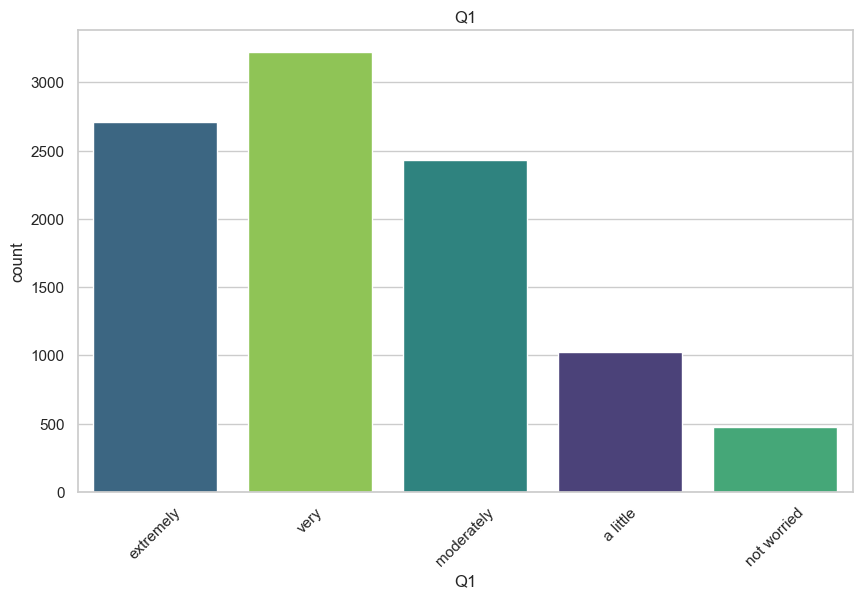

In [15]:
order = ['extremely', 'very', 'moderately', 'a little', 'not worried']
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10, 6))
# Sort by the value counts of the Q1 column
# sns.countplot(x='Q1', data=df, hue='Q1', palette='viridis', legend=False, order=df['Q1'].value_counts().sort_values(ascending=False).index)
sns.countplot(x='Q1', data=df, hue='Q1', palette='viridis', legend=False, order=order)
plt.xticks(rotation=45)
plt.title('Q1')
plt.show()

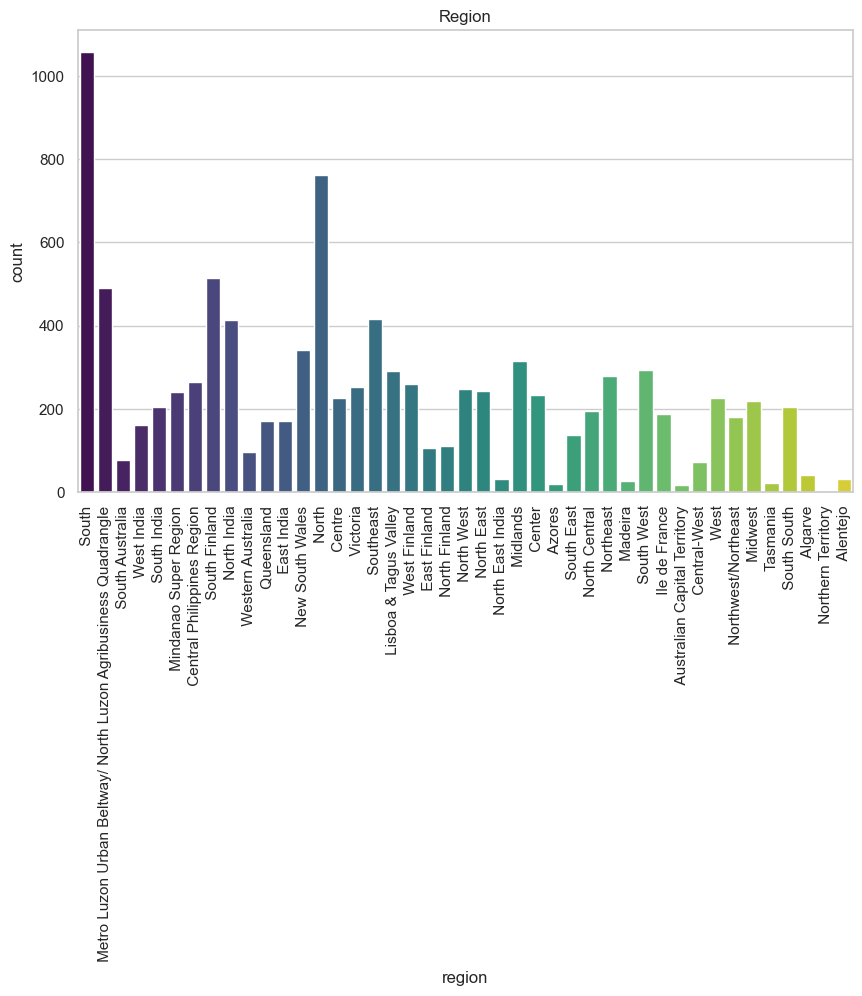

In [16]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.countplot(x='region', data=df, hue='region', palette='viridis', legend=False)
plt.xticks(rotation=90)
plt.title('Region')
plt.show()

In [17]:
# Find all rows with no null values
df[df.notnull().any(axis=1)]

,Repondent_Serial,language,country,age,sex,country:region,Q1,Q2_sad,Q2_helpless,Q2_anxious,...,Q8_hopeful,Q8_angry,Q8_valued,Q8_ashamed,Q8_belittled,Q8_protected,yyyymmdd,AgeGender,weight,region
0,25.0,French,France,22.0,man,France: South,extremely,yes,yes,yes,...,not at all,extremely,not at all,moderately,NaN,not at all,20210518.0,Men 21-25,0.955127,South
1,26.0,English,Philippines,25.0,woman,Philippines: Metro Luzon Urban Beltway/ North ...,extremely,yes,yes,yes,...,moderately,moderately,moderately,moderately,moderately,moderately,20210518.0,Women 21-25,0.649680,Metro Luzon Urban Beltway/ North Luzon Agribu...
2,27.0,English,Philippines,24.0,woman,Philippines: Metro Luzon Urban Beltway/ North ...,extremely,yes,yes,yes,...,not at all,moderately,not at all,moderately,moderately,not at all,20210518.0,Women 21-25,0.649680,Metro Luzon Urban Beltway/ North Luzon Agribu...
3,28.0,English,Australia,20.0,woman,Australia: South Australia,a little,no,yes,no,...,not at all,not at all,not at all,not at all,not at all,not at all,20210518.0,Women 16-20,0.915752,South Australia
4,29.0,English,India,18.0,woman,India: West India,extremely,no,no,no,...,extremely,very,extremely,very,extremely,extremely,20210518.0,Women 16-20,1.183360,West India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15413.0,English,Australia,21.0,woman,Australia: Tasmania,extremely,yes,yes,yes,...,a little,extremely,a little,extremely,a little,not at all,20210607.0,Women 21-25,0.739153,Tasmania
9996,15415.0,English,Australia,25.0,woman,Australia: New South Wales,very,yes,yes,yes,...,a little,moderately,not at all,a little,not at all,a little,20210607.0,Women 21-25,0.771648,New South Wales
9997,15416.0,English,Australia,19.0,woman,Australia: New South Wales,extremely,yes,yes,yes,...,not at all,not at all,not at all,not at all,not at all,not at all,20210607.0,Women 16-20,0.869418,New South Wales
9998,15417.0,English,Australia,21.0,woman,Australia: Western Australia,very,yes,yes,yes,...,moderately,moderately,a little,very,moderately,a little,20210607.0,Women 21-25,0.821953,Western Australia


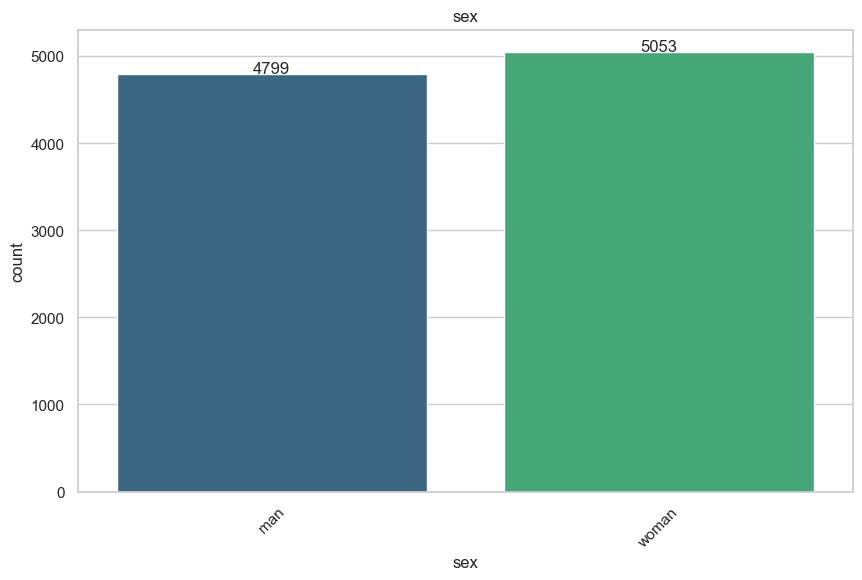

In [18]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10, 6))

# Limit the number of unique values in the 'sex' column to a manageable number
top_sex = df['sex'].value_counts().nlargest(10).index
df_limited = df[df['sex'].isin(top_sex)]

sns.countplot(x='sex', data=df_limited, hue='sex', palette='viridis', legend=False)
plt.xticks(rotation=45)
plt.title('sex')

for i, sex in enumerate(df_limited['sex'].unique()):
    sex_count = df_limited['sex'].value_counts()[sex]
    plt.text(i, sex_count, f'{sex_count}', ha='center')

plt.show()

##### Note: Show most populus regions in the dataset

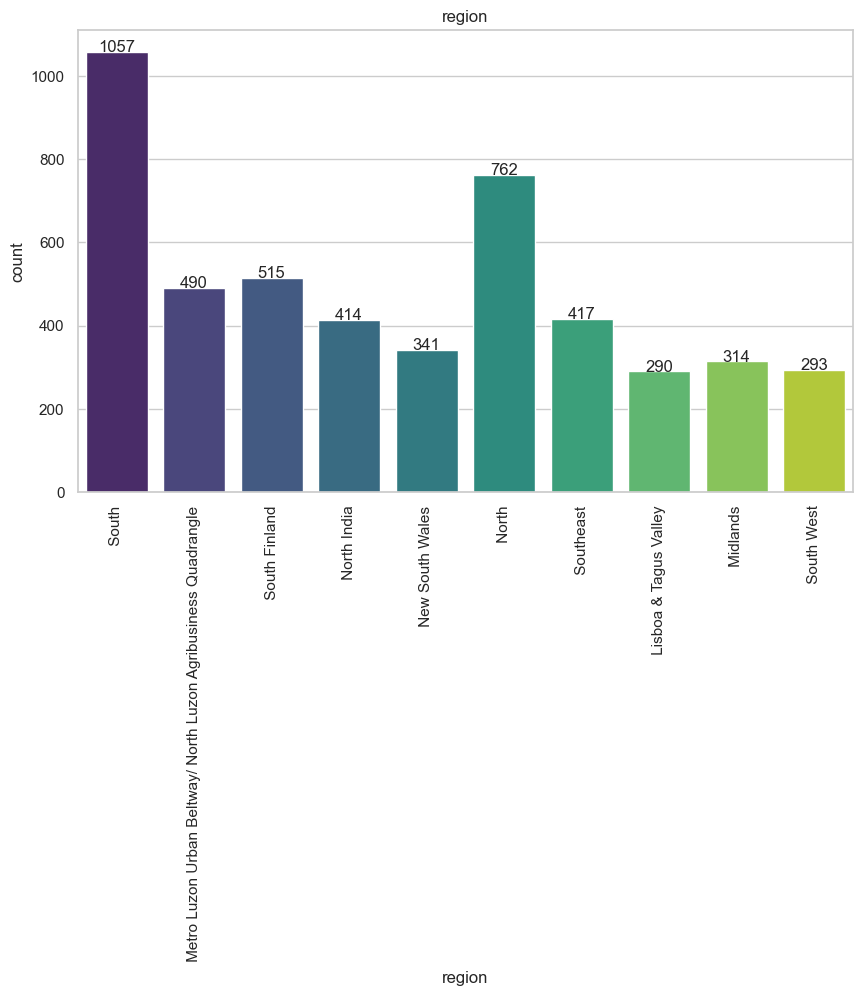

In [19]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10, 6))

# Limit the number of unique values in the 'region' column to a manageable number
top_region = df['region'].value_counts().nlargest(10).index
df_limited = df[df['region'].isin(top_region)]

sns.countplot(x='region', data=df_limited, hue='region', palette='viridis', legend=False)
plt.xticks(rotation=90)
plt.title('region')

for i, region in enumerate(df_limited['region'].unique()):
    region_count = df_limited['region'].value_counts()[region]
    plt.text(i, region_count, f'{region_count}', ha='center')

plt.show()

In [20]:
# drop unused variables 
X = df.drop(columns=['Repondent_Serial', 'language', 'country', 'country:region', 'yyyymmdd', 'AgeGender', 'region', 'weight']) # not the same as the X used in data analysis

for column in X.columns:
    summary = X[column].describe()

    print(f'{column}') 
    print(summary)

age
count    9852.000000
mean       21.241677
std         2.550188
min        16.000000
25%        19.000000
50%        21.000000
75%        23.000000
max        25.000000
Name: age, dtype: float64
sex
count      9852
unique        2
top       woman
freq       5053
Name: sex, dtype: object
Q1
count     9852
unique       5
top       very
freq      3223
Name: Q1, dtype: object
Q2_sad
count     9735
unique       2
top        yes
freq      6661
Name: Q2_sad, dtype: object
Q2_helpless
count     9711
unique       2
top        yes
freq      5073
Name: Q2_helpless, dtype: object
Q2_anxious
count     9720
unique       2
top        yes
freq      6179
Name: Q2_anxious, dtype: object
Q2_afraid
count     9740
unique       2
top        yes
freq      6744
Name: Q2_afraid, dtype: object
Q2_optimistic
count     9636
unique       2
top         no
freq      6596
Name: Q2_optimistic, dtype: object
Q2_angry
count     9707
unique       2
top        yes
freq      5704
Name: Q2_angry, dtype: object
Q2_guilty


In [21]:
# Change the sex column to be binary (0 or 1)
X['sex'] = [0 if sex == 'man' else 1 for sex in df['sex']]

#change yes/no questions to be binary (0 = no, 1 = yes?)
for column in X.columns:
    if X[column].unique().size == 2:
        X[column] = [0 if value == X[column].unique()[0] else 1 for value in X[column]]
    else:
        X[column] = X[column].astype('category').cat.codes

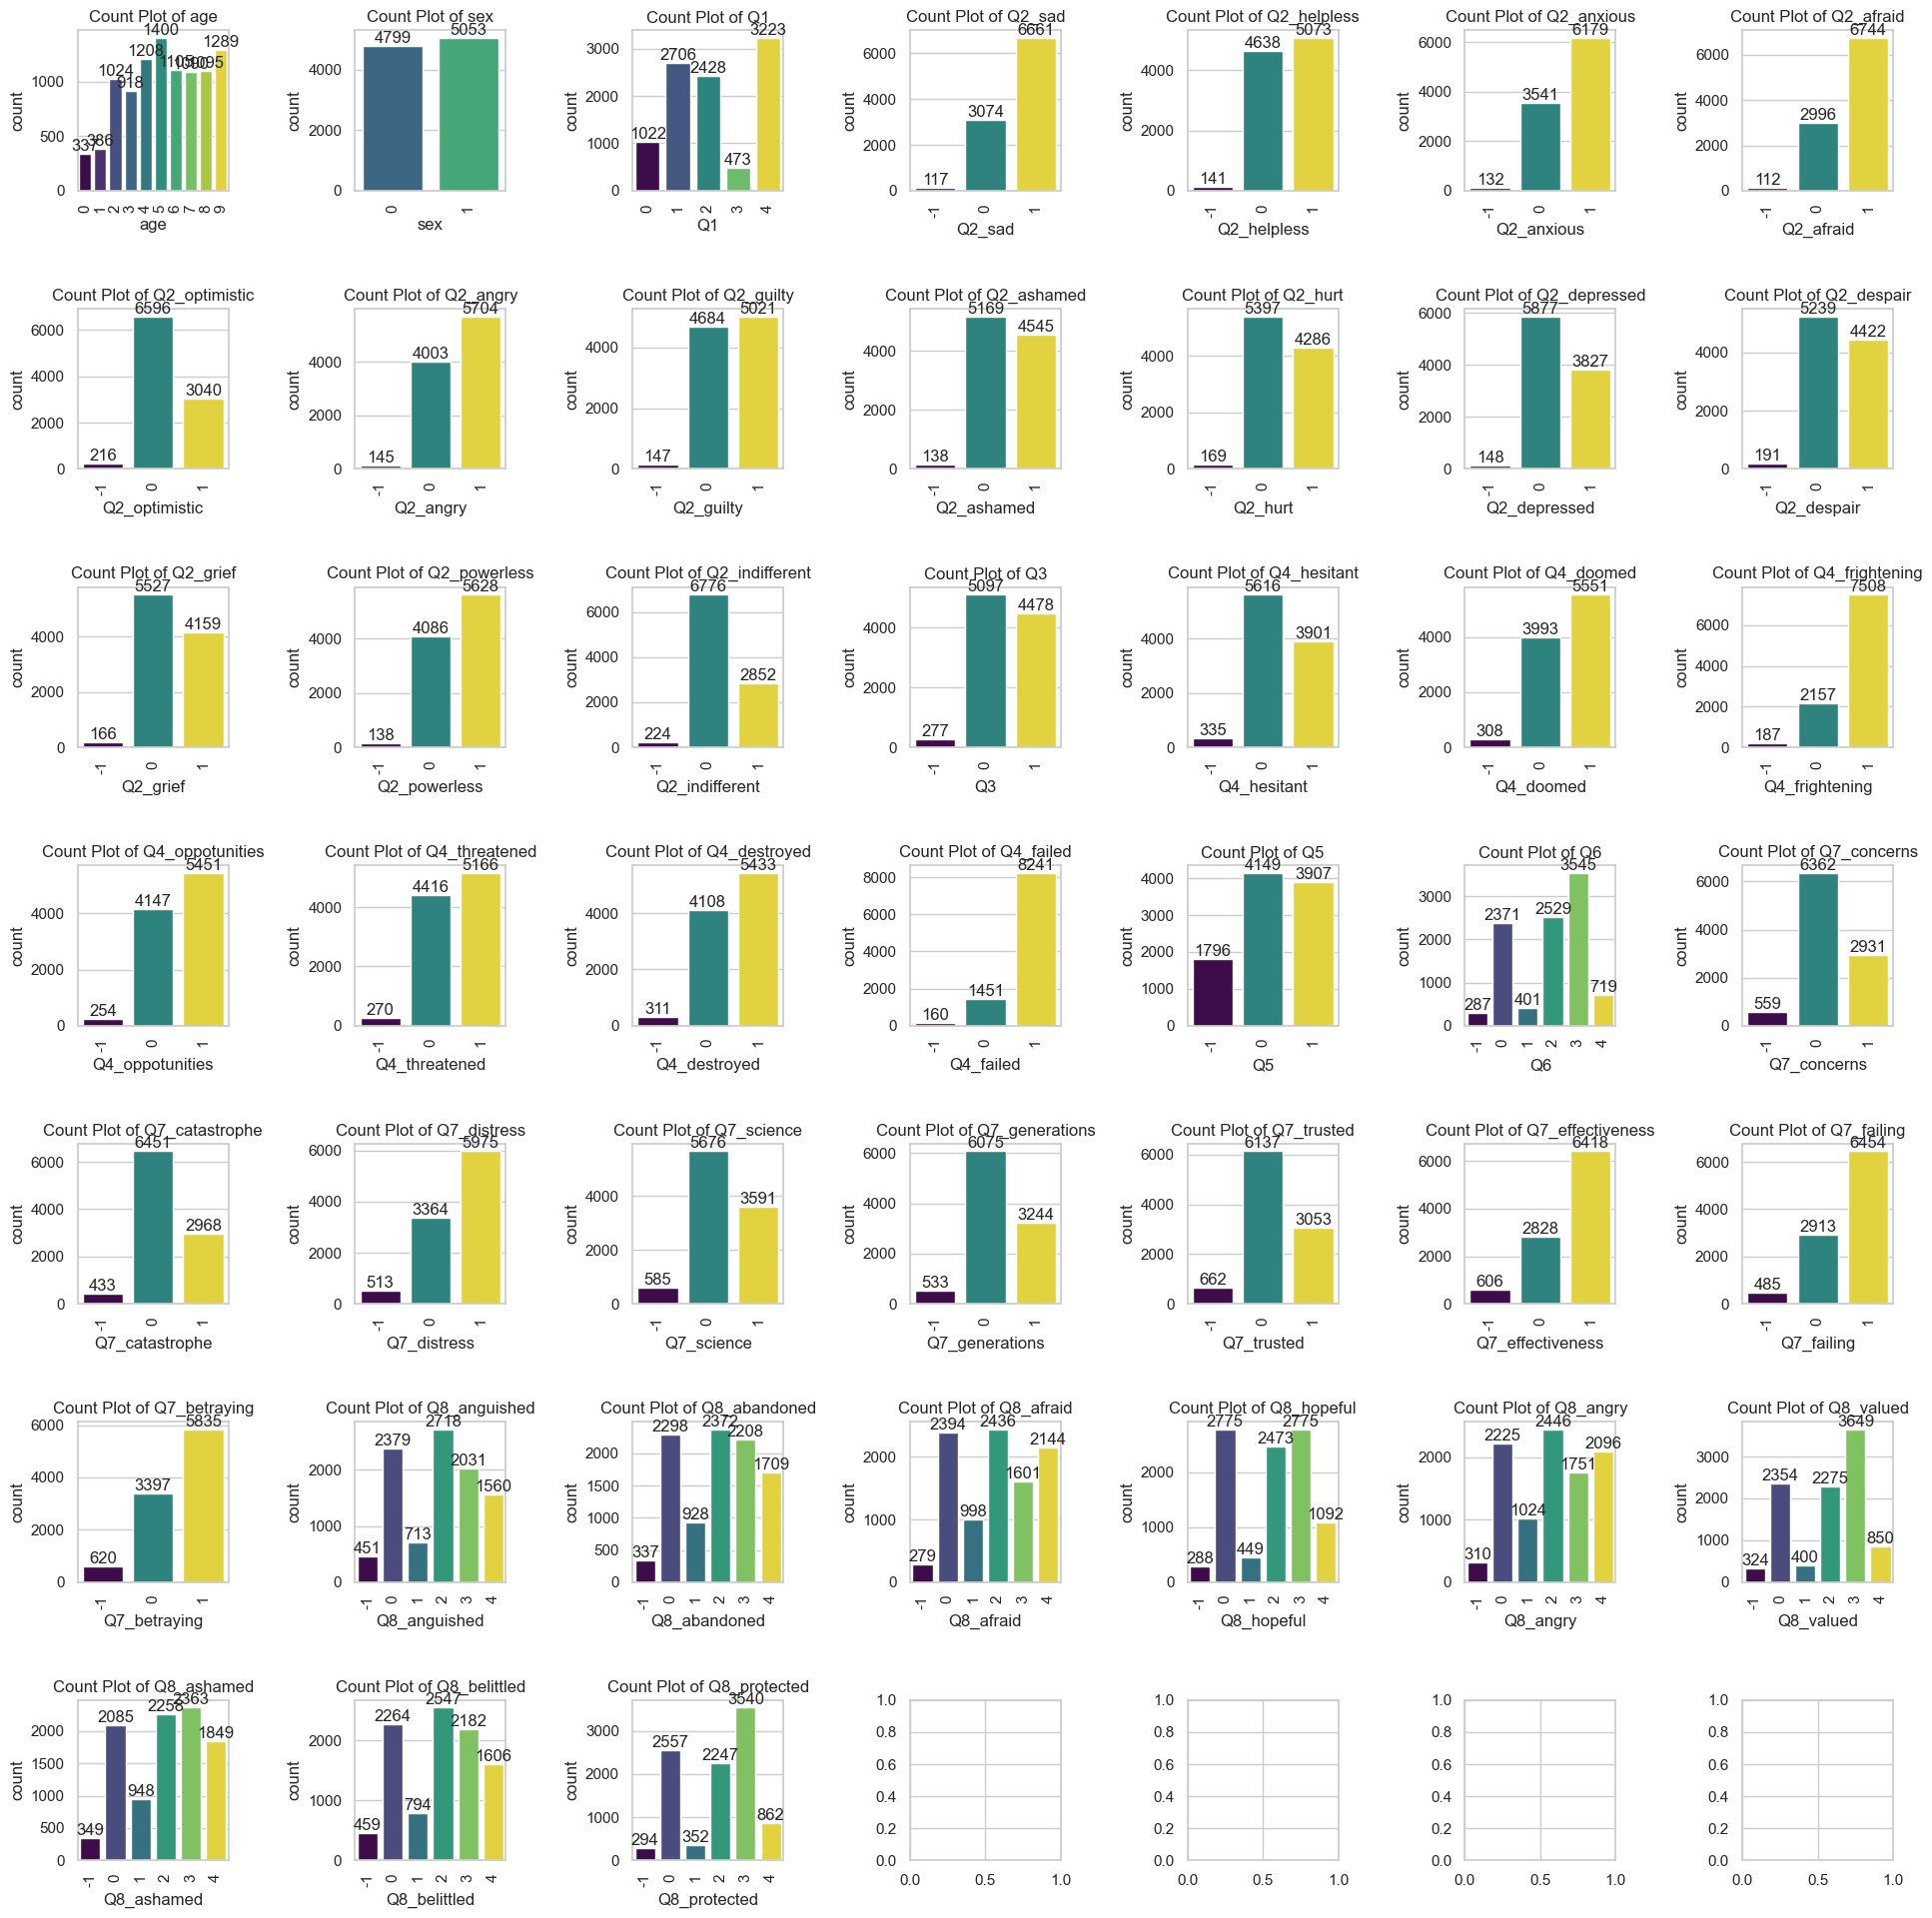

In [22]:
sns.set_theme(style='whitegrid')

# Calculate the number of rows and columns for the subplots
num_columns = len(X.columns)
num_rows = int(np.ceil(np.sqrt(num_columns)))
num_cols = int(np.ceil(num_columns / num_rows))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
axes = axes.flatten()

for i, column in enumerate(X.columns):
    ax = sns.countplot(x=column, data=X, hue=column, palette='viridis', legend=False, ax=axes[i])
    ax.set_title(f'Count Plot of {column}')
    ax.tick_params(axis='x', rotation=90)
    
    for p in ax.patches:
        height = p.get_height()
        if not pd.isna(height):
            ax.text(
                x=p.get_x() + p.get_width() / 2,
                y=height,
                s=int(height),
                ha='center',
                va='bottom'
            )

plt.tight_layout(pad=3.0)
plt.show()

In [23]:
# Correlations

correlations = X.corr()
q1_correlations = correlations['Q1'].sort_values(ascending=False)
# print the correlation matrix
print(correlations)

# Individually, none of the variables that we are using seem to have any practically significant correlations with Q1. 
# The variable with the Q1 correlation with the largest magnitude is Q2_afraid, with a correlaiton of .082.

                       age       sex        Q1    Q2_sad  Q2_helpless  \
age               1.000000  0.030007 -0.000428  0.075355     0.035521   
sex               0.030007  1.000000 -0.012853  0.103277     0.101728   
Q1               -0.000428 -0.012853  1.000000  0.065961     0.011044   
Q2_sad            0.075355  0.103277  0.065961  1.000000     0.335613   
Q2_helpless       0.035521  0.101728  0.011044  0.335613     1.000000   
Q2_anxious        0.045919  0.120005  0.033932  0.377651     0.326747   
Q2_afraid         0.050670  0.114791  0.082485  0.454444     0.328608   
Q2_optimistic     0.057790 -0.088594 -0.009904  0.054620     0.082687   
Q2_angry          0.045025  0.070764  0.047512  0.418831     0.306425   
Q2_guilty         0.034995  0.101030  0.035970  0.399607     0.318458   
Q2_ashamed        0.021845  0.055619  0.031588  0.358981     0.305620   
Q2_hurt           0.063011  0.036012 -0.018183  0.393785     0.316446   
Q2_depressed      0.071025  0.033227 -0.043321  0.3

## Data Analysis
Try data anaylsis with different models. Try with and without non-numeric columns (like language, country).

### Models without non-numeric columns:
#### Variables + Train and Test Split

In [123]:
before = X['sex'].value_counts()

In [124]:
# First iteration of the data cleaning process

# Change the sex column to be binary (0 or 1)
X['sex'] = [0 if sex == 'man' else 1 for sex in df['sex']]

original_labels = {}

#change yes/no questions to be binary (0 = no, 1 = yes?)
for column in X.columns:
    original_labels[column] = zip(X[column].unique(), X[column].astype('category').cat.codes.to_numpy())
    X[column] = X[column].astype('category').cat.codes

X

,age,sex,Q2_sad,Q2_helpless,Q2_anxious,Q2_afraid,Q2_optimistic,Q2_angry,Q2_guilty,Q2_ashamed,...,Q7_betraying,Q8_anguished,Q8_abandoned,Q8_afraid,Q8_hopeful,Q8_angry,Q8_valued,Q8_ashamed,Q8_belittled,Q8_protected
0,6,0,2,2,2,2,2,2,2,2,...,1,3,5,5,4,2,4,3,0,4
1,9,1,2,2,2,2,2,2,2,2,...,2,3,3,3,3,3,3,3,3,3
2,8,1,2,2,2,2,1,2,2,2,...,2,3,3,3,4,3,4,3,3,4
3,4,1,1,2,1,1,1,1,2,1,...,0,3,4,4,4,4,4,4,4,4
4,2,1,1,1,1,2,2,1,1,2,...,2,5,5,5,2,5,2,5,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5,1,2,2,2,2,1,2,2,2,...,2,5,1,2,1,2,1,2,1,4
9996,9,1,2,2,2,2,1,2,1,2,...,1,1,5,3,1,3,4,1,4,1
9997,3,1,2,2,2,2,2,2,2,2,...,2,4,4,4,4,4,4,4,4,4
9998,5,1,2,2,2,2,1,2,2,2,...,2,1,1,5,3,3,1,5,3,1


In [125]:
original_labels

{'age': <zip at 0x3211e3f00>,
 'sex': <zip at 0x3211e3b00>,
 'Q2_sad': <zip at 0x3440dd000>,
 'Q2_helpless': <zip at 0x3211b4800>,
 'Q2_anxious': <zip at 0x344077540>,
 'Q2_afraid': <zip at 0x3440de780>,
 'Q2_optimistic': <zip at 0x3211cd1c0>,
 'Q2_angry': <zip at 0x320687400>,
 'Q2_guilty': <zip at 0x32070f040>,
 'Q2_ashamed': <zip at 0x3211daa80>,
 'Q2_hurt': <zip at 0x3211b5f00>,
 'Q2_depressed': <zip at 0x32070f0c0>,
 'Q2_despair': <zip at 0x3440de740>,
 'Q2_grief': <zip at 0x320714900>,
 'Q2_powerless': <zip at 0x3440fcdc0>,
 'Q2_indifferent': <zip at 0x32070ca40>,
 'Q3': <zip at 0x32070f640>,
 'Q4_hesitant': <zip at 0x3440eb800>,
 'Q4_doomed': <zip at 0x321185280>,
 'Q4_frightening': <zip at 0x32117ca80>,
 'Q4_oppotunities': <zip at 0x3440ff040>,
 'Q4_threatened': <zip at 0x3440eb0c0>,
 'Q4_destroyed': <zip at 0x320703200>,
 'Q4_failed': <zip at 0x3440fe480>,
 'Q5': <zip at 0x3211f03c0>,
 'Q6': <zip at 0x1696853c0>,
 'Q7_concerns': <zip at 0x34400f380>,
 'Q7_catastrophe': <zip at

In [126]:
after = X['sex'].value_counts()
before.values == after.values

array([ True,  True])

In [127]:
X = df.drop(columns=['Repondent_Serial', 'language', 'country', 'country:region', 'yyyymmdd', 'AgeGender', 'region', 'weight', 'Q1']) # not the same as the X used in data analysis
y = df['Q1']

In [128]:
# Change the sex column to be binary (0 or 1)
X['sex'] = [0 if sex == 'man' else 1 for sex in df['sex']]

#change yes/no questions to be binary (0 = no, 1 = yes?)
for column in X.columns:
    if X[column].unique().size == 2:
        X[column] = [0 if value == X[column].unique()[0] else 1 for value in X[column]]
    else:
        X[column] = X[column].astype('category').cat.codes

X

,age,sex,Q2_sad,Q2_helpless,Q2_anxious,Q2_afraid,Q2_optimistic,Q2_angry,Q2_guilty,Q2_ashamed,...,Q7_betraying,Q8_anguished,Q8_abandoned,Q8_afraid,Q8_hopeful,Q8_angry,Q8_valued,Q8_ashamed,Q8_belittled,Q8_protected
0,6,0,1,1,1,1,1,1,1,1,...,0,2,4,4,3,1,3,2,-1,3
1,9,1,1,1,1,1,1,1,1,1,...,1,2,2,2,2,2,2,2,2,2
2,8,1,1,1,1,1,0,1,1,1,...,1,2,2,2,3,2,3,2,2,3
3,4,1,0,1,0,0,0,0,1,0,...,-1,2,3,3,3,3,3,3,3,3
4,2,1,0,0,0,1,1,0,0,1,...,1,4,4,4,1,4,1,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5,1,1,1,1,1,0,1,1,1,...,1,4,0,1,0,1,0,1,0,3
9996,9,1,1,1,1,1,0,1,0,1,...,0,0,4,2,0,2,3,0,3,0
9997,3,1,1,1,1,1,1,1,1,1,...,1,3,3,3,3,3,3,3,3,3
9998,5,1,1,1,1,1,0,1,1,1,...,1,0,0,4,2,2,0,4,2,0


In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.cat.codes
y_test = y_test.cat.codes

In [130]:
X_nominal = X.filter(regex='Q2|Q3|Q4|Q5|Q7')
X_nominal.columns, len(X_nominal.columns)

(Index(['Q2_sad', 'Q2_helpless', 'Q2_anxious', 'Q2_afraid', 'Q2_optimistic',
        'Q2_angry', 'Q2_guilty', 'Q2_ashamed', 'Q2_hurt', 'Q2_depressed',
        'Q2_despair', 'Q2_grief', 'Q2_powerless', 'Q2_indifferent', 'Q3',
        'Q4_hesitant', 'Q4_doomed', 'Q4_frightening', 'Q4_oppotunities',
        'Q4_threatened', 'Q4_destroyed', 'Q4_failed', 'Q5', 'Q7_concerns',
        'Q7_catastrophe', 'Q7_distress', 'Q7_science', 'Q7_generations',
        'Q7_trusted', 'Q7_effectiveness', 'Q7_failing', 'Q7_betraying'],
       dtype='object'),
 32)

In [131]:
# All columns that start with Q6 or Q8 will be in df_ordinal
X_ordinal = X.filter(regex='Q6|Q8')
X_ordinal.columns, len(X_ordinal.columns)

(Index(['Q6', 'Q8_anguished', 'Q8_abandoned', 'Q8_afraid', 'Q8_hopeful',
        'Q8_angry', 'Q8_valued', 'Q8_ashamed', 'Q8_belittled', 'Q8_protected'],
       dtype='object'),
 10)

#### Precurssor: KNN Model (K-Nearest Neighbors)

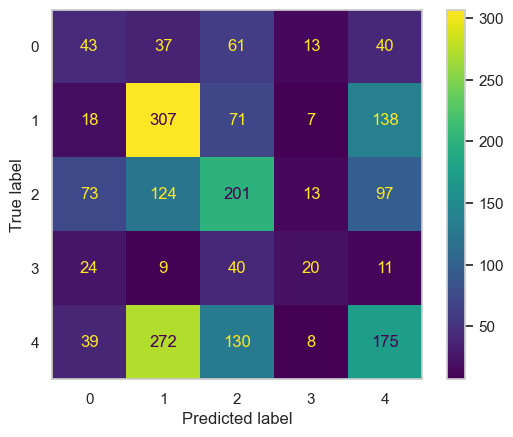

In [132]:
# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.grid(False)
plt.show()

In [133]:
accuracy_score(y_test, y_pred)

0.3784880771182141

In [134]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.22      0.22      0.22       194
           1       0.41      0.57      0.48       541
           2       0.40      0.40      0.40       508
           3       0.33      0.19      0.24       104
           4       0.38      0.28      0.32       624

    accuracy                           0.38      1971
   macro avg       0.35      0.33      0.33      1971
weighted avg       0.37      0.38      0.37      1971



#### Model 1: Oridnal/Nominal Logistic Regression

##### Nominal

In [135]:
nom_X_train, nom_X_test, nom_y_train, nom_y_test = train_test_split(X_nominal, y, test_size=0.2, random_state=42)

# Nominal logistic regression
nominal_logistic = LogisticRegression(max_iter=1000)
nominal_logistic.fit(nom_X_train, nom_y_train)

nominal_logistic.score(nom_X_test, nom_y_test)

0.44951801116184675

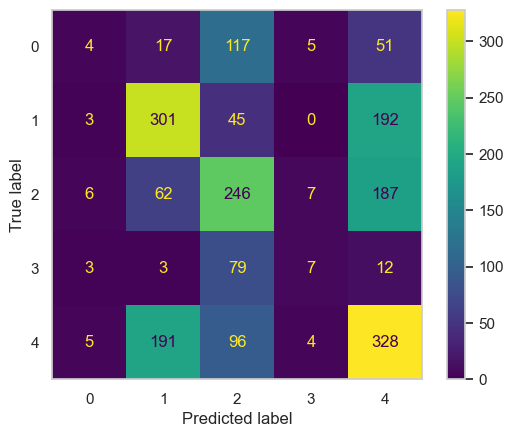

In [136]:
# nominal confusion matrix
nom_y_pred = nominal_logistic.predict(nom_X_test)
nom_cm = confusion_matrix(nom_y_test, nom_y_pred)
nom_disp = ConfusionMatrixDisplay(confusion_matrix=nom_cm)
nom_disp.plot()
plt.grid(False)
plt.show()

In [78]:
print(classification_report(nom_y_test, nom_y_pred))

              precision    recall  f1-score   support

    a little       0.19      0.02      0.04       194
   extremely       0.53      0.56      0.54       541
  moderately       0.42      0.48      0.45       508
 not worried       0.29      0.07      0.11       104
        very       0.43      0.52      0.47       624

    accuracy                           0.45      1971
   macro avg       0.37      0.33      0.32      1971
weighted avg       0.42      0.45      0.42      1971



##### Check Class Distribution

In [171]:
label_counts = y.value_counts()
label_counts

Q1
very           3223
extremely      2706
moderately     2428
a little       1022
not worried     473
Name: count, dtype: int64

##### Resampling Techniques
Resample the data to balance the classes.

In [172]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

##### Model Tuning: 

Experiment with different model complexities and regularization parameters.

In [173]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(solver='lbfgs', max_iter=5000), param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=5000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]})

In [174]:
print(grid.best_params_)

{'C': 0.1}


In [175]:
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.24      0.04      0.06       194
           1       0.53      0.55      0.54       541
           2       0.44      0.52      0.48       508
           3       0.42      0.11      0.17       104
           4       0.43      0.52      0.47       624

    accuracy                           0.46      1971
   macro avg       0.41      0.35      0.34      1971
weighted avg       0.44      0.46      0.44      1971



##### Ordinal

In [137]:
ordinal_X_train, ordinal_X_test, ordinal_y_train, ordinal_y_test = train_test_split(X_ordinal, y, test_size=0.2, random_state=42)

# Ordinal logistic regression
ordinal_logistic = LogisticRegression(max_iter=1000)
ordinal_logistic.fit(ordinal_X_train, ordinal_y_train)

ordinal_logistic.score(ordinal_X_test, ordinal_y_test)

0.3181126331811263

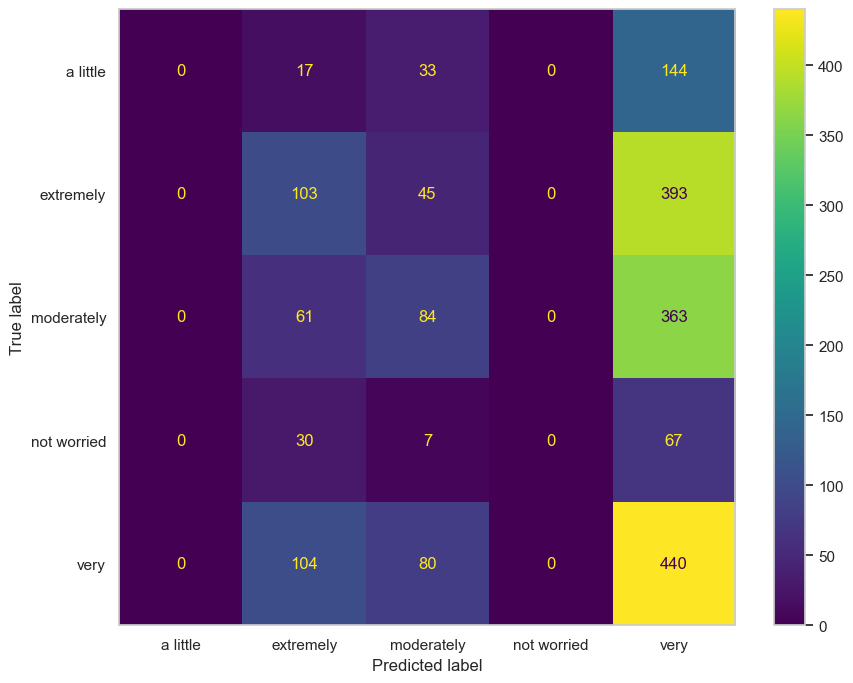

In [138]:
# Ordinal confusion matrix
ordinal_pred = ordinal_logistic.predict(ordinal_X_test)
cm = confusion_matrix(ordinal_y_test, ordinal_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=ordinal_logistic.classes_)
fig, ax = plt.subplots(figsize=(10, 8))
cm_display.plot(ax=ax)
plt.grid(False)  # Disable the grid
plt.show()

In [139]:
print(classification_report(ordinal_y_test, ordinal_pred))

              precision    recall  f1-score   support

    a little       0.00      0.00      0.00       194
   extremely       0.33      0.19      0.24       541
  moderately       0.34      0.17      0.22       508
 not worried       0.00      0.00      0.00       104
        very       0.31      0.71      0.43       624

    accuracy                           0.32      1971
   macro avg       0.20      0.21      0.18      1971
weighted avg       0.28      0.32      0.26      1971



/opt/anaconda3/envs/math/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/math/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/math/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/var/folders/cn/2914x2w5213cm0p8fp564wfm0000gn/T/ipykernel_34553/336447444.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ordinal_logistic.coef_[0], y=X_ordinal.columns, palette='viridis')


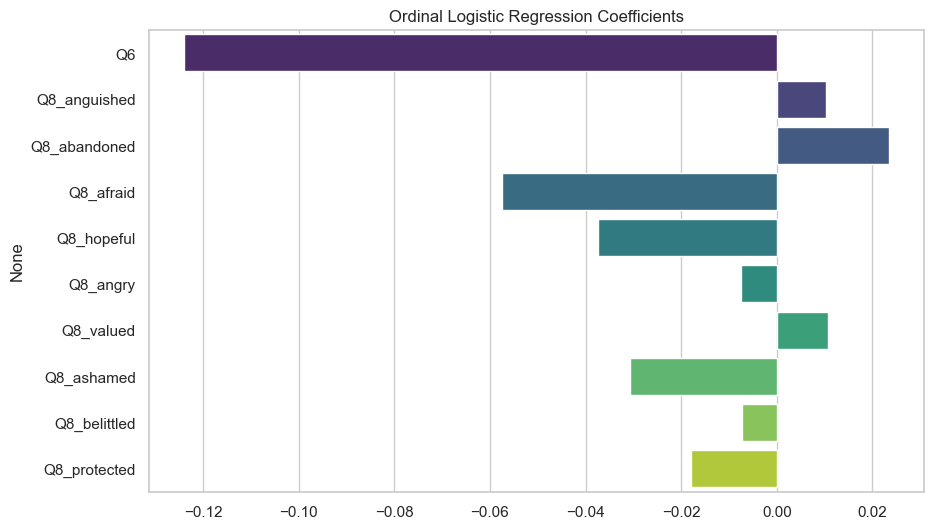

In [140]:
# Plot ordinal logistic regression coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x=ordinal_logistic.coef_[0], y=X_ordinal.columns, palette='viridis')
plt.title('Ordinal Logistic Regression Coefficients')
plt.show()

In [141]:
mod_log = OrderedModel(ordinal_y_train, ordinal_X_train, distr='logit')
res_log = mod_log.fit(method='bfgs')
res_log.summary()

/opt/anaconda3/envs/math/lib/python3.12/site-packages/statsmodels/miscmodels/ordinal_model.py:205: Warning: the endog has ordered == False, risk of capturing a wrong order for the categories. ordered == True preferred.
  warnings.warn("the endog has ordered == False, "


Optimization terminated successfully.
         Current function value: 1.443598
         Iterations: 17
         Function evaluations: 19
         Gradient evaluations: 19


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                     Q1   Log-Likelihood:                -11377.
Model:                   OrderedModel   AIC:                         2.278e+04
Method:            Maximum Likelihood   BIC:                         2.288e+04
Date:                Thu, 12 Dec 2024                                         
Time:                        00:31:25                                         
No. Observations:                7881                                         
Df Residuals:                    7867                                         
Df Model:                          10                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Q6                         0.0416      0.015      2.727      0.006       0.012       0.072
Q8_anguished              -0.0327      0.015     -2.122      0.034      -0.063      -0.002
Q8_abandoned               0.0172      0.015      1.118      0.264      -0.013       0.047
Q8_afraid                  0.0119      0.015      0.803      0.422      -0.017       0.041
Q8_hopeful                 0.0134      0.015      0.880      0.379      -0.016       0.043
Q8_angry                  -0.0175      0.015     -1.168      0.243      -0.047       0.012
Q8_valued                 -0.0340      0.016     -2.098      0.036      -0.066      -0.002
Q8_ashamed                 0.0072      0.015      0.476      0.634      -0.022       0.037
Q8_belittled              -0.0028      0.015     -0.183      0.854      -0.033       0.027
Q8_protected              -0.0141      0.016     -0.876      0.381      -0.046       0.017
a little/extremely        -2.1630      0.062    -35.160      0.000      -2.284      -2.042
extremely/moderately       0.5029      0.020     24.588      0.000       0.463       0.543
moderately/not worried    -0.0046      0.021     -0.223      0.824      -0.045       0.036
not worried/very          -1.5819      0.051    -31.071      0.000      -1.682      -1.482
==========================================================================================
"""

In [142]:
num_of_thresholds = 2
mod_log.transform_threshold_params(res_log.params[-num_of_thresholds:])

array([       -inf, -0.00460601,  0.20097732,         inf])

In [143]:
import statsmodels.api as sm

#
X_train_dummy = pd.get_dummies(X_train, drop_first=True)
X_test_dummy = pd.get_dummies(X_test, drop_first=True)

X_variables = X_train_dummy.columns

#### Model 2: Random Forest

In [144]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [145]:
y_pred_RF = rf.predict(X_test)
accuracy_score(y_test, y_pred_RF)

0.44951801116184675

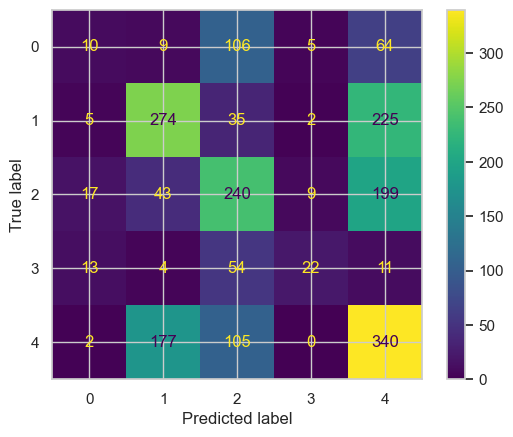

In [146]:
cm = confusion_matrix(y_test, y_pred_RF)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

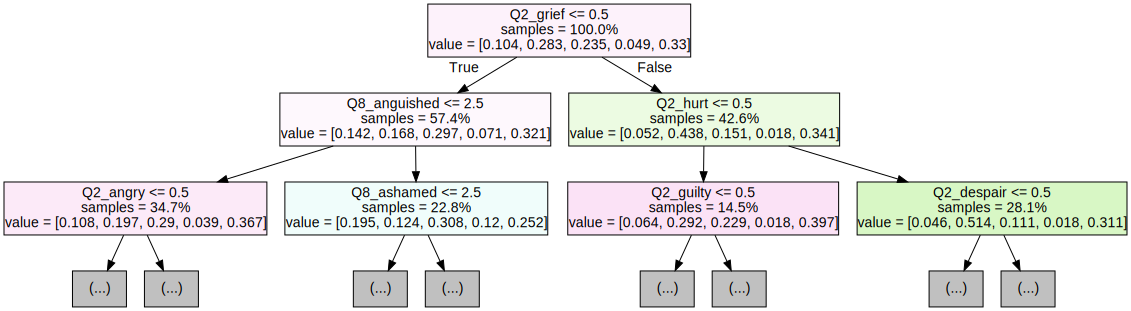

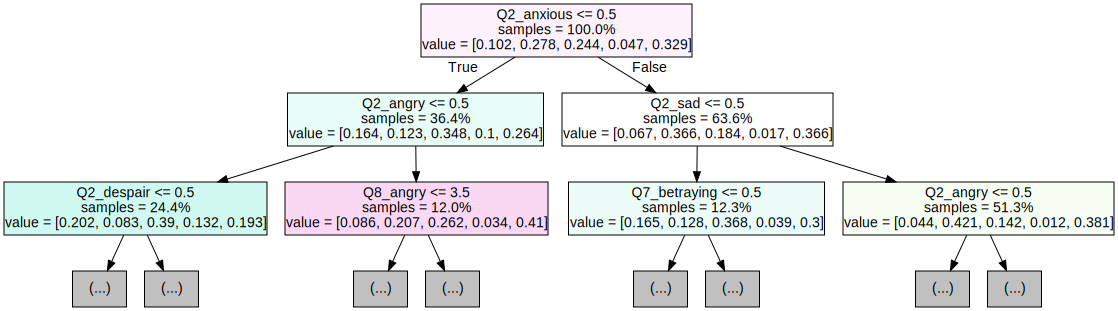

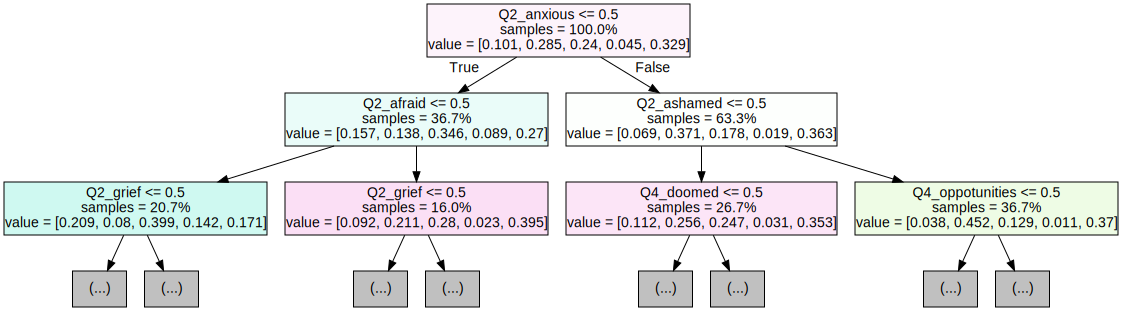

In [147]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [148]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x167348830>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1665ef8f0>})

Best hyperparameters: {'max_depth': 11, 'n_estimators': 239}


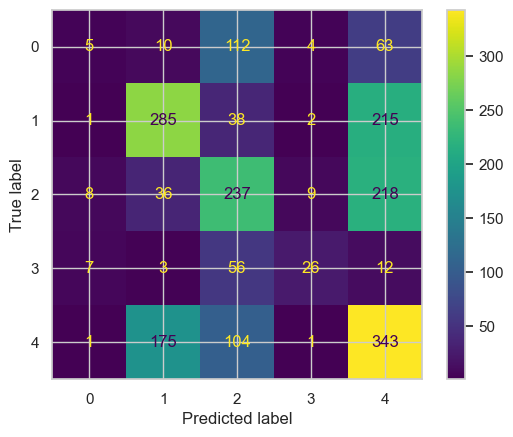

In [149]:
# best model!
best_rf = rand_search.best_estimator_

print('Best hyperparameters:',  rand_search.best_params_)
cm = confusion_matrix(y_test, best_rf.predict(X_test))
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [150]:
print(np.mean(y_pred == y_test), np.mean(y_pred != y_test))

0.3784880771182141 0.6215119228817859


##### Random Forest (Bagging Classifier)

In [151]:
tree = DecisionTreeClassifier(min_samples_leaf=7) #min_samples_split=11

In [152]:
ens_model = BaggingClassifier(estimator=tree, n_estimators=100, 
                                  bootstrap=True,
                                  bootstrap_features=True,     # RF
                                  oob_score=True,                     
                                  random_state=0).fit(X_train, y_train)

print('oob score =', ens_model.oob_score_)

pred = ens_model.predict(X_test)

oob score = 0.47329019160005076


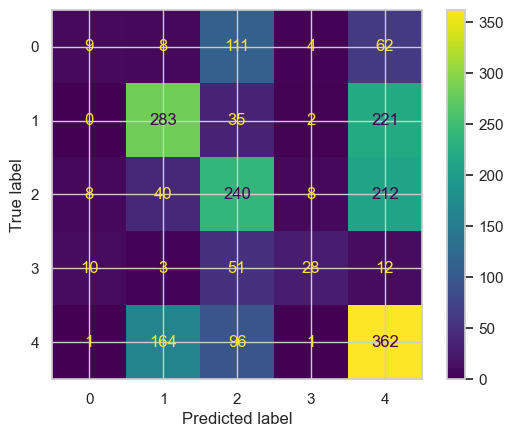

In [153]:
cm = confusion_matrix(y_test, pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [154]:
accuracy_score(y_test, pred)

0.46778285134449515

In [155]:
precision_score(y_test, pred, average='macro')

0.4815433302776113

In [156]:
recall_score(y_test, pred, average='macro')

0.37825940645236134

#### Model 3: Gradient Boosting

In [ ]:
gbc = GradientBoostingClassifier()
 
gbc.fit(X_train, y_train)
 
y_pred_gbc = gbc.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_gbc)

In [ ]:
cm_gbc = confusion_matrix(y_test, y_pred_gbc)
ConfusionMatrixDisplay(confusion_matrix=cm_gbc).plot();

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gbc))

In [ ]:

feature_importances_gbc = gbc.feature_importances_
indices_gbc = np.argsort(feature_importances_gbc)[::-1]

feature_names = df.columns
top_feature_names = feature_names[indices_gbc[:3]]
top_feature_importances = feature_importances_gbc[indices_gbc[:3]]

plt.figure(figsize=(10, 6))
plt.title("Top 5 Feature Importances")
plt.barh(range(top_n), top_feature_importances[::-1], align="center")  
plt.yticks(range(top_n), top_feature_names[::-1])  
plt.xlabel("Feature Importance")
plt.show()


In [ ]:
# Hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best Parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Train the model with the best parameters
best_gb_clf = grid_search.best_estimator_
y_pred_best = best_gb_clf.predict(X_test)

# Evaluate the best model
print(f'Best Model Accuracy: {accuracy_score(y_test, y_pred_best):.4f}')
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

In [ ]:
cv_scores = cross_val_score(gbc, X, y, cv=5, scoring='accuracy')
print(f'Cross-validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}')

#### Model 4: Neural Network

In [178]:
X = df.drop(columns=['Repondent_Serial', 'language', 'country', 'country:region', 'yyyymmdd', 'AgeGender', 'region', 'weight', 'Q1']) # not the same as the X used in data analysis
y = df['Q1']

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [180]:
# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X_train.select_dtypes(include=['float64']).columns),
        ('cat', OneHotEncoder(), X_train.select_dtypes(include=['object', 'category']).columns)
    ])

# Create a pipeline with preprocessing and the classifier model 
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age'], dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['sex', 'Q2_sad', 'Q2_helpless', 'Q2_anxious', 'Q2_afraid',
       'Q2_optimistic', 'Q2_angry', 'Q2_guilty', 'Q2_ashamed', 'Q2_hurt',
       'Q2_depressed', 'Q2_despair', 'Q2_grief', 'Q2_powerless',
       'Q2_indifferent', 'Q3', 'Q4_hesit...
       'Q4_oppotunities', 'Q4_threatened', 'Q4_destroyed', 'Q4_failed', 'Q5',
       'Q6', 'Q7_concerns', 'Q7_catastrophe', 'Q7_distress', 'Q7_science',
       'Q7_generations', 'Q7_trusted', 'Q7_effectiveness', 'Q7_failing',
       'Q7_betraying', 'Q8_anguished', 'Q8_abandoned', 'Q8_afraid',
       'Q8_hopeful', 'Q8_angry', 'Q8_valued', 'Q8_ashamed', 'Q8_belittled',
       'Q8_protected'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier())])

In [181]:
# Predict the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.4617

Classification Report:
              precision    recall  f1-score   support

    a little       0.30      0.08      0.13       194
   extremely       0.56      0.52      0.54       541
  moderately       0.45      0.47      0.46       508
 not worried       0.62      0.28      0.38       104
        very       0.41      0.55      0.47       624

    accuracy                           0.46      1971
   macro avg       0.47      0.38      0.40      1971
weighted avg       0.46      0.46      0.45      1971



In [182]:
# Cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
print(f'Cross-validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}')

# Define the hyperparameter grid
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [3, 5, 7]
}

# GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best Parameters
print("Best Hyperparameters:", grid_search.best_params_)
# Train the model with the best parameters
best_pipeline = grid_search.best_estimator_
y_pred_best = best_pipeline.predict(X_test)

# Evaluate the best model
print(f'Best Model Accuracy: {accuracy_score(y_test, y_pred_best):.4f}')
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

Cross-validation Accuracy: 0.4712 ± 0.0145
Best Hyperparameters: {'classifier__max_depth': 7, 'classifier__n_estimators': 200}
Best Model Accuracy: 0.4642

Classification Report:
              precision    recall  f1-score   support

    a little       0.43      0.02      0.03       194
   extremely       0.56      0.52      0.54       541
  moderately       0.44      0.47      0.46       508
 not worried       0.77      0.23      0.36       104
        very       0.41      0.58      0.48       624

    accuracy                           0.46      1971
   macro avg       0.52      0.37      0.37      1971
weighted avg       0.48      0.46      0.44      1971



In [ ]:
from prince import MCA

In [157]:
X = df.drop(columns=['Repondent_Serial', 'language', 'country', 'country:region', 'yyyymmdd', 'AgeGender', 'region', 'weight', 'Q1']) # not the same as the X used in data analysis
y = df['Q1']

In [158]:
X['age'].isnull().any()

False

In [159]:
for column in X.columns:
    print(f'{column}: \n{X[column].unique()}\n\n')

age: 
[22. 25. 24. 20. 18. 21. 23. 19. 17. 16.]


sex: 
['man', 'woman']
Categories (2, object): ['man', 'woman']


Q2_sad: 
['yes', 'no', NaN]
Categories (2, object): ['no', 'yes']


Q2_helpless: 
['yes', 'no', NaN]
Categories (2, object): ['no', 'yes']


Q2_anxious: 
['yes', 'no', NaN]
Categories (2, object): ['no', 'yes']


Q2_afraid: 
['yes', 'no', NaN]
Categories (2, object): ['no', 'yes']


Q2_optimistic: 
['yes', 'no', NaN]
Categories (2, object): ['no', 'yes']


Q2_angry: 
['yes', 'no', NaN]
Categories (2, object): ['no', 'yes']


Q2_guilty: 
['yes', 'no', NaN]
Categories (2, object): ['no', 'yes']


Q2_ashamed: 
['yes', 'no', NaN]
Categories (2, object): ['no', 'yes']


Q2_hurt: 
['yes', 'no', NaN]
Categories (2, object): ['no', 'yes']


Q2_depressed: 
['yes', 'no', NaN]
Categories (2, object): ['no', 'yes']


Q2_despair: 
['no', 'yes', NaN]
Categories (2, object): ['no', 'yes']


Q2_grief: 
['yes', 'no', NaN]
Categories (2, object): ['no', 'yes']


Q2_powerless: 
['no', 'yes'

In [160]:
X

,age,sex,Q2_sad,Q2_helpless,Q2_anxious,Q2_afraid,Q2_optimistic,Q2_angry,Q2_guilty,Q2_ashamed,...,Q7_betraying,Q8_anguished,Q8_abandoned,Q8_afraid,Q8_hopeful,Q8_angry,Q8_valued,Q8_ashamed,Q8_belittled,Q8_protected
0,22.0,man,yes,yes,yes,yes,yes,yes,yes,yes,...,no,moderately,very,very,not at all,extremely,not at all,moderately,NaN,not at all
1,25.0,woman,yes,yes,yes,yes,yes,yes,yes,yes,...,yes,moderately,moderately,moderately,moderately,moderately,moderately,moderately,moderately,moderately
2,24.0,woman,yes,yes,yes,yes,no,yes,yes,yes,...,yes,moderately,moderately,moderately,not at all,moderately,not at all,moderately,moderately,not at all
3,20.0,woman,no,yes,no,no,no,no,yes,no,...,NaN,moderately,not at all,not at all,not at all,not at all,not at all,not at all,not at all,not at all
4,18.0,woman,no,no,no,yes,yes,no,no,yes,...,yes,very,very,very,extremely,very,extremely,very,extremely,extremely
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,21.0,woman,yes,yes,yes,yes,no,yes,yes,yes,...,yes,very,a little,extremely,a little,extremely,a little,extremely,a little,not at all
9996,25.0,woman,yes,yes,yes,yes,no,yes,no,yes,...,no,a little,very,moderately,a little,moderately,not at all,a little,not at all,a little
9997,19.0,woman,yes,yes,yes,yes,yes,yes,yes,yes,...,yes,not at all,not at all,not at all,not at all,not at all,not at all,not at all,not at all,not at all
9998,21.0,woman,yes,yes,yes,yes,no,yes,yes,yes,...,yes,a little,a little,very,moderately,moderately,a little,very,moderately,a little


In [161]:
X.columns.isnull == False

False

In [162]:
X.dtypes

age                  float64
sex                 category
Q2_sad              category
Q2_helpless         category
Q2_anxious          category
Q2_afraid           category
Q2_optimistic       category
Q2_angry            category
Q2_guilty           category
Q2_ashamed          category
Q2_hurt             category
Q2_depressed        category
Q2_despair          category
Q2_grief            category
Q2_powerless        category
Q2_indifferent      category
Q3                  category
Q4_hesitant         category
Q4_doomed           category
Q4_frightening      category
Q4_oppotunities     category
Q4_threatened       category
Q4_destroyed        category
Q4_failed           category
Q5                  category
Q6                  category
Q7_concerns         category
Q7_catastrophe      category
Q7_distress         category
Q7_science          category
Q7_generations      category
Q7_trusted          category
Q7_effectiveness    category
Q7_failing          category
Q7_betraying  

In [163]:
for column in X.columns:
    try:
        X.fillna(-1, inplace=True)
    except:
        pass

In [164]:
X

,age,sex,Q2_sad,Q2_helpless,Q2_anxious,Q2_afraid,Q2_optimistic,Q2_angry,Q2_guilty,Q2_ashamed,...,Q7_betraying,Q8_anguished,Q8_abandoned,Q8_afraid,Q8_hopeful,Q8_angry,Q8_valued,Q8_ashamed,Q8_belittled,Q8_protected
0,22.0,man,yes,yes,yes,yes,yes,yes,yes,yes,...,no,moderately,very,very,not at all,extremely,not at all,moderately,NaN,not at all
1,25.0,woman,yes,yes,yes,yes,yes,yes,yes,yes,...,yes,moderately,moderately,moderately,moderately,moderately,moderately,moderately,moderately,moderately
2,24.0,woman,yes,yes,yes,yes,no,yes,yes,yes,...,yes,moderately,moderately,moderately,not at all,moderately,not at all,moderately,moderately,not at all
3,20.0,woman,no,yes,no,no,no,no,yes,no,...,NaN,moderately,not at all,not at all,not at all,not at all,not at all,not at all,not at all,not at all
4,18.0,woman,no,no,no,yes,yes,no,no,yes,...,yes,very,very,very,extremely,very,extremely,very,extremely,extremely
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,21.0,woman,yes,yes,yes,yes,no,yes,yes,yes,...,yes,very,a little,extremely,a little,extremely,a little,extremely,a little,not at all
9996,25.0,woman,yes,yes,yes,yes,no,yes,no,yes,...,no,a little,very,moderately,a little,moderately,not at all,a little,not at all,a little
9997,19.0,woman,yes,yes,yes,yes,yes,yes,yes,yes,...,yes,not at all,not at all,not at all,not at all,not at all,not at all,not at all,not at all,not at all
9998,21.0,woman,yes,yes,yes,yes,no,yes,yes,yes,...,yes,a little,a little,very,moderately,moderately,a little,very,moderately,a little


In [165]:
# Change the sex column to be binary (0 or 1)
X['sex'] = [0 if sex == 'man' else 1 for sex in df['sex']]

#change yes/no questions to be binary (0 = no, 1 = yes?)
for column in X.columns:
    if X[column].unique().size == 2:
        X[column] = [0 if value == X[column].unique()[0] else 1 for value in X[column]]
    else:
        X[column] = X[column].astype('category').cat.codes

X

,age,sex,Q2_sad,Q2_helpless,Q2_anxious,Q2_afraid,Q2_optimistic,Q2_angry,Q2_guilty,Q2_ashamed,...,Q7_betraying,Q8_anguished,Q8_abandoned,Q8_afraid,Q8_hopeful,Q8_angry,Q8_valued,Q8_ashamed,Q8_belittled,Q8_protected
0,6,0,1,1,1,1,1,1,1,1,...,0,2,4,4,3,1,3,2,-1,3
1,9,1,1,1,1,1,1,1,1,1,...,1,2,2,2,2,2,2,2,2,2
2,8,1,1,1,1,1,0,1,1,1,...,1,2,2,2,3,2,3,2,2,3
3,4,1,0,1,0,0,0,0,1,0,...,-1,2,3,3,3,3,3,3,3,3
4,2,1,0,0,0,1,1,0,0,1,...,1,4,4,4,1,4,1,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5,1,1,1,1,1,0,1,1,1,...,1,4,0,1,0,1,0,1,0,3
9996,9,1,1,1,1,1,0,1,0,1,...,0,0,4,2,0,2,3,0,3,0
9997,3,1,1,1,1,1,1,1,1,1,...,1,3,3,3,3,3,3,3,3,3
9998,5,1,1,1,1,1,0,1,1,1,...,1,0,0,4,2,2,0,4,2,0


In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.cat.codes
y_test = y_test.cat.codes

In [167]:
# Make a tensorflow model to predict Q1
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

model.evaluate(X_test, y_test)

/opt/anaconda3/envs/math/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3158 - loss: 1.5131 - val_accuracy: 0.4141 - val_loss: 1.2864
Epoch 2/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3985 - loss: 1.3246 - val_accuracy: 0.4293 - val_loss: 1.2606
Epoch 3/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4321 - loss: 1.2801 - val_accuracy: 0.4464 - val_loss: 1.2429
Epoch 4/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4200 - loss: 1.2889 - val_accuracy: 0.4547 - val_loss: 1.2298
Epoch 5/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4468 - loss: 1.2752 - val_accuracy: 0.4509 - val_loss: 1.2272
Epoch 6/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4264 - loss: 1.2520 - val_accuracy: 0.4534 - val_loss: 1.2197
Epoch 7/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4623 - loss: 1.2342 - val_accuracy: 0.4540 - val_loss: 1.2280
Epoch 8/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4611 - loss: 1.2133 - val_accuracy: 0.

[1.4170026779174805, 0.42059868574142456]

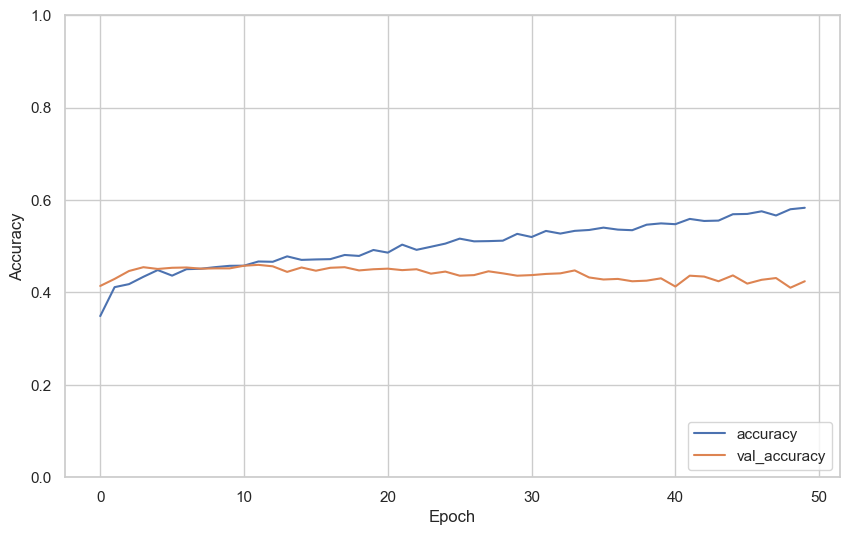

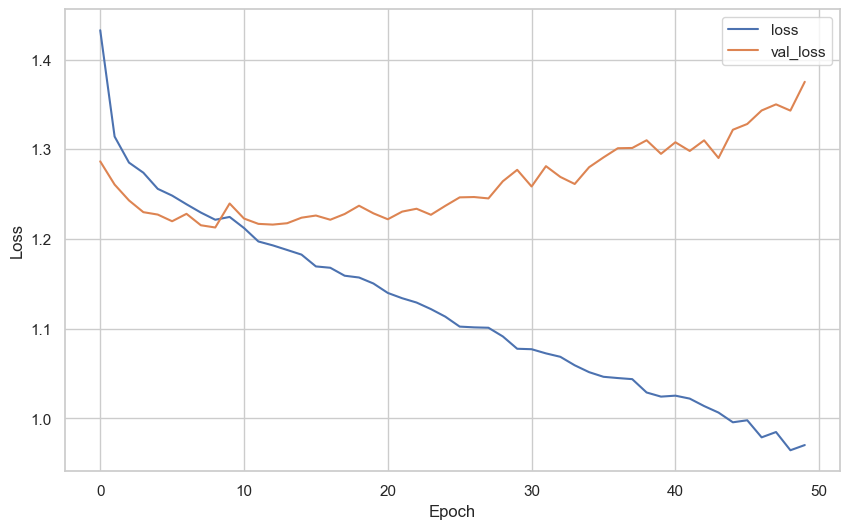

In [168]:
# Accuracy and error plots
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


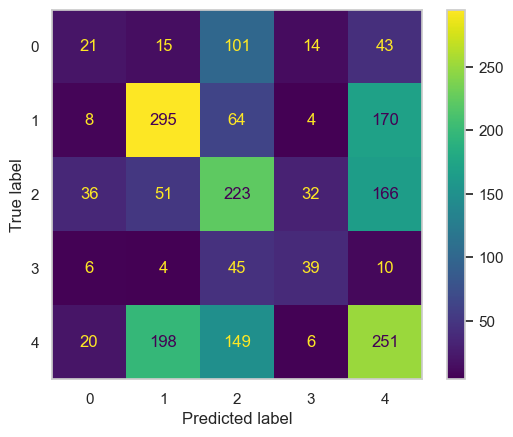

In [169]:
# Confusion matrix for the test data for the neural network
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred)
nn_disp = ConfusionMatrixDisplay(confusion_matrix=cm)
nn_disp.plot()
plt.grid(False)
plt.show()